# Goodreads Ratings Based Book Recommendation Engine


1. Loading required libraries, with installation

2. Basic Data Exploration

3. Exploratory Data Analysis
    1. Which are the books with most occurances in the list?
    2. Which are the top 10 most rated books?
    3. Which are the authors with most books?
    4. Which are the top 10 highly rated authors?
    5. What is the rating distribution for the books?
    6. Is there relationship between ratings and review counts?
    7. Is there a relationship between number of pages and ratings?
    8. Is there a relationship between ratings and ratings count?
    9. Which are the books with the highest reviews?
    
4. Topic Modelling
    1. KMeans Clustering
    2. KMeans Clustering with optimisaztion

5. Book Recommendation Engine
    

#Loading libraries with installation

In [1]:
!pip install urllib3
!pip install isbnlib
!pip install newspaper3k

import numpy as np
import pandas as pd
import os
import seaborn as sns
import isbnlib
from newspaper import Article
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
from progressbar import ProgressBar
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

#Basic Data Exploration

In [5]:
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('books.csv', on_bad_lines='skip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
df.index = df['bookID']

In [7]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 11123 rows and 12 columns


We see that there seems to be J.K. Rowling, predominantly in the head of this dataframe. Yet there's Mary here too. We will fix this, just for the sake of brevity with all the numerous listings her books are sure to have.

In [8]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Fixing the name for every Harry Potter series to be just J.K. Rowling.

In [9]:
df.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)



In [10]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


#### Columns Description:

- **bookID** Contains the unique ID for each book/series
- **title** contains the titles of the books
- **authors** contains the author of the particular book
- **average_rating** the average rating of the books, as decided by the users
- **ISBN** ISBN(10) number, tells the information about a book - such as edition and publisher
- **ISBN 13** The new format for ISBN, implemented in 2007. 13 digits
- **language_code** Tells the language for the books
- **Num_pages** Contains the number of pages for the book
- **Ratings_count** Contains the number of ratings given for the book
- **text_reviews_count** Has the count of reviews left by users

#Exploratory Data Analysis

### Which are the books with most occurances in the list?

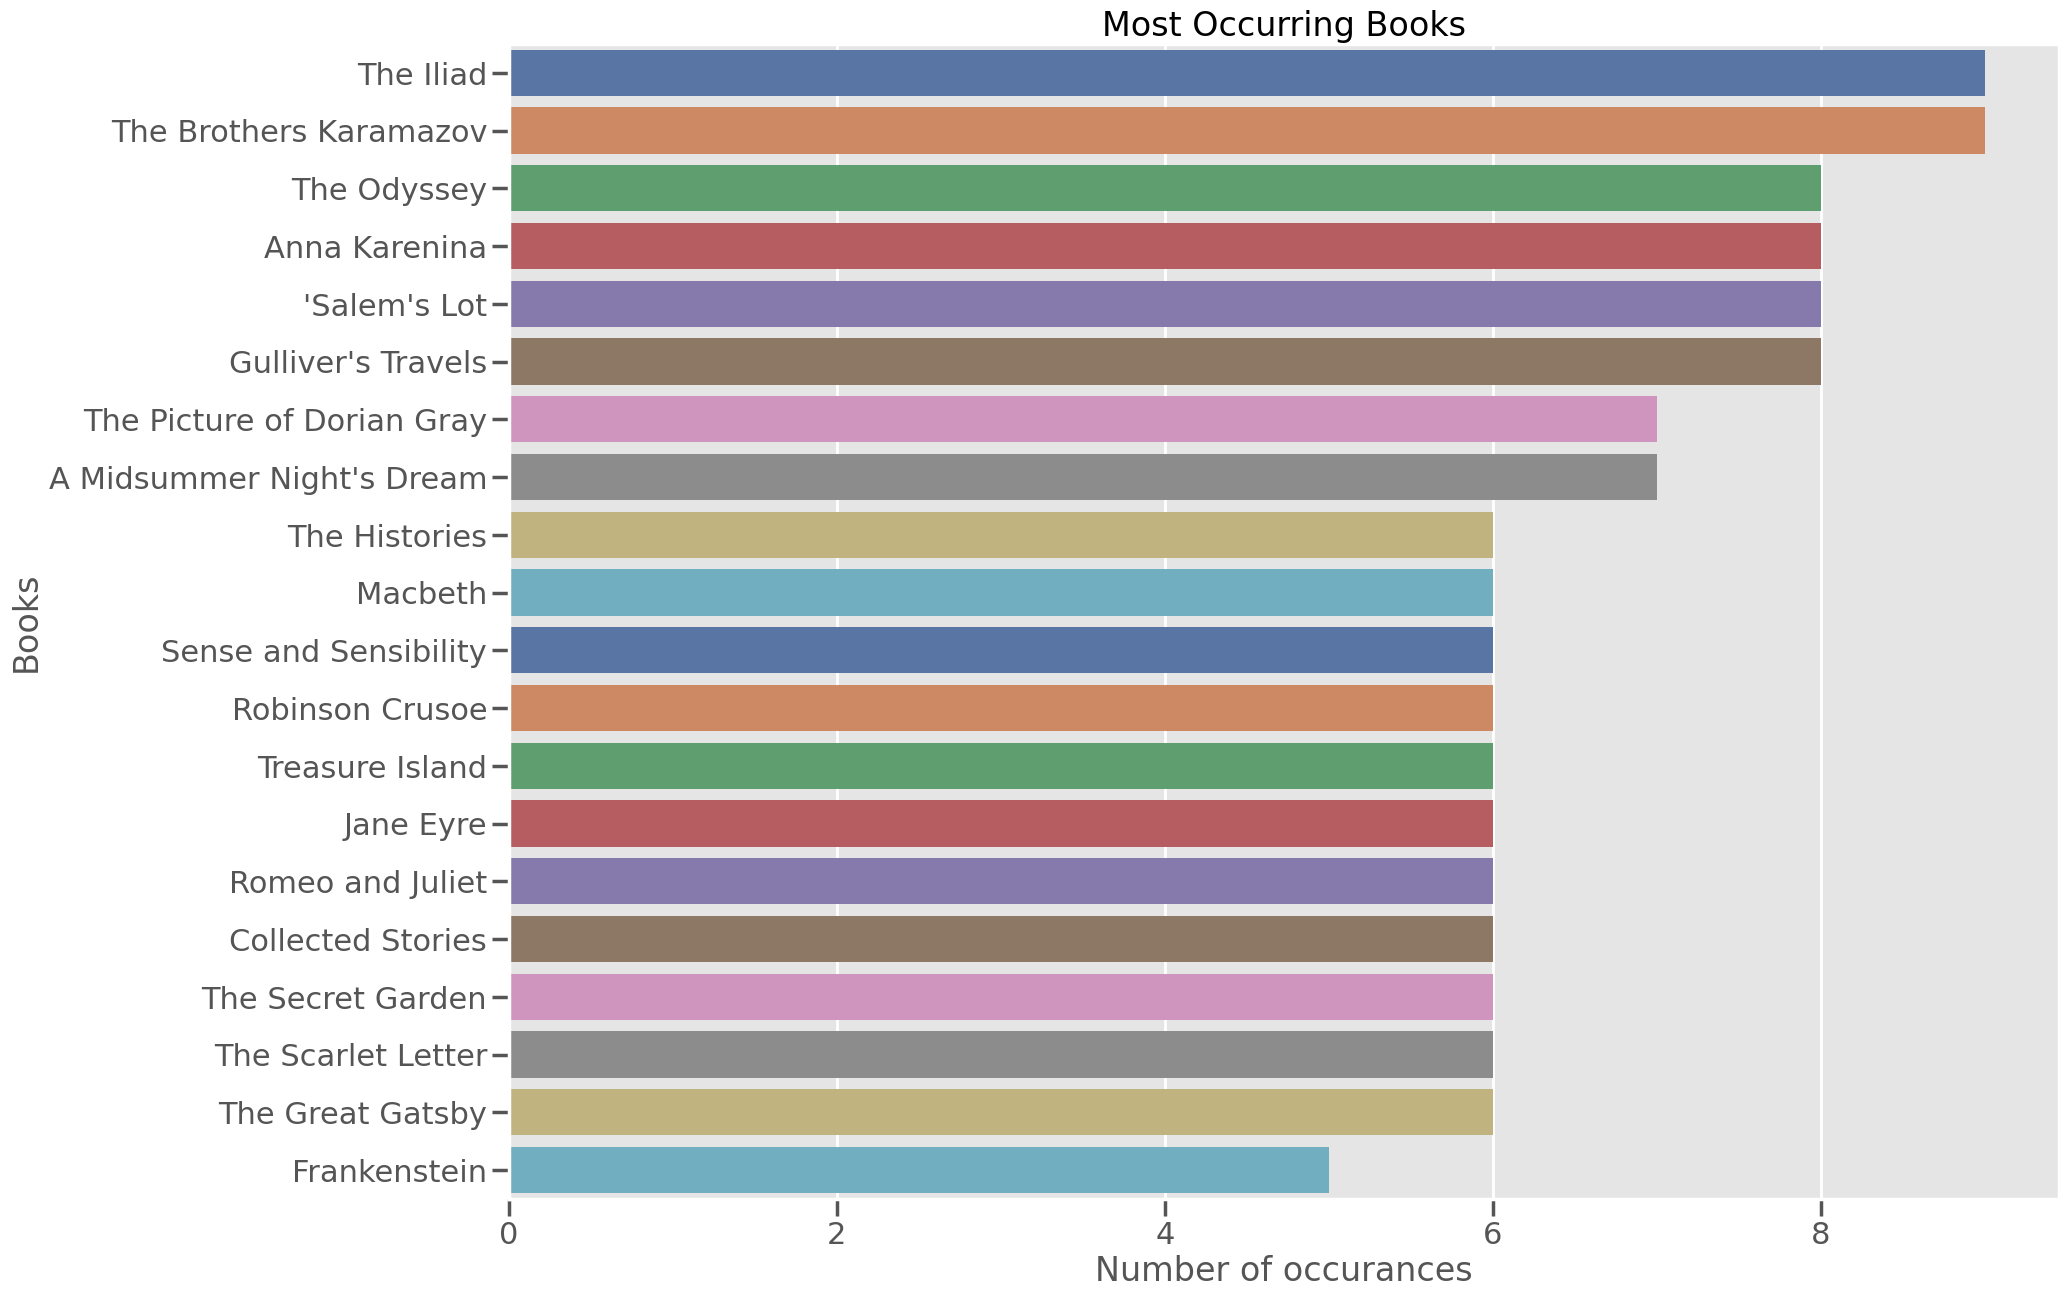

In [11]:
#Taking the first 20:

sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['title'].value_counts()[:20]
rating = df.average_rating[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

We can see that **The Iliad** and **The Brother's Karamazov** have the most number of occurrances with the same name in the data.

These books have come up in this database over and over again, with various publication editions. From the list, we can see that most of the books from the given chart are either old, steadfast classics or books which are usually assigned to schools.

### Which are the top 10 most rated books?

<Axes: xlabel='ratings_count', ylabel='title'>

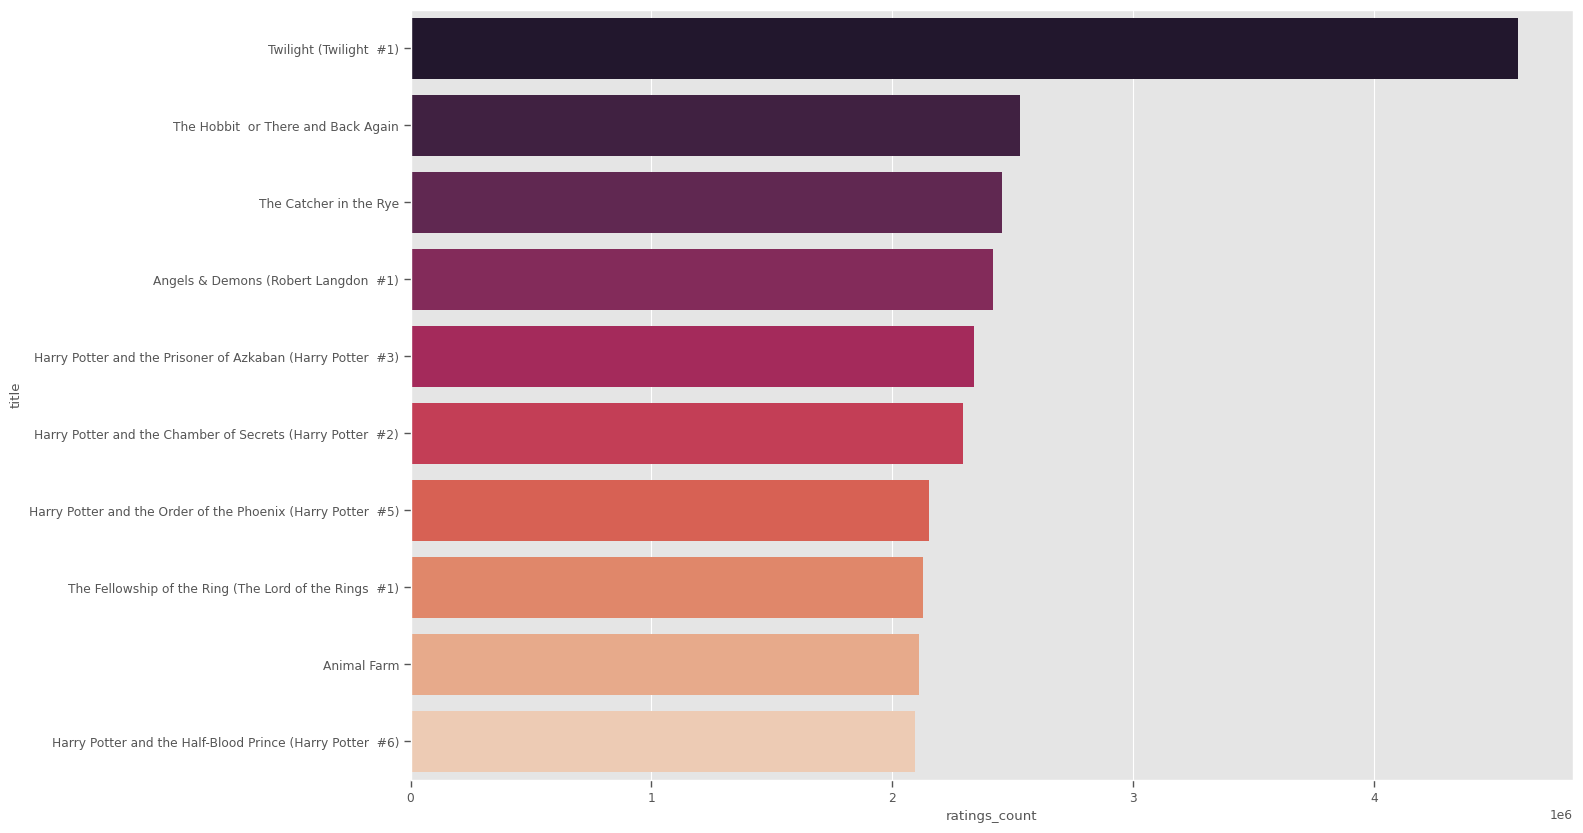

In [14]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='rocket')

1. We can see that the beginning books of the series usually have most of the ratings, i.e, **Harry Potter and the Sorcerer's stone**, **Twilight #1**, **The Hobbit**, **Angels and demons #1**.

2. Twilights's first book dominates the section by having more than 5000000 ratings. Infact, apart from a few, such as Catcher in the Rye and Animal Farm, all of the books seem to be from a series of books, implying perhaps that once people begin a series, they are likely to complete it.

### Which are the authors with most books?

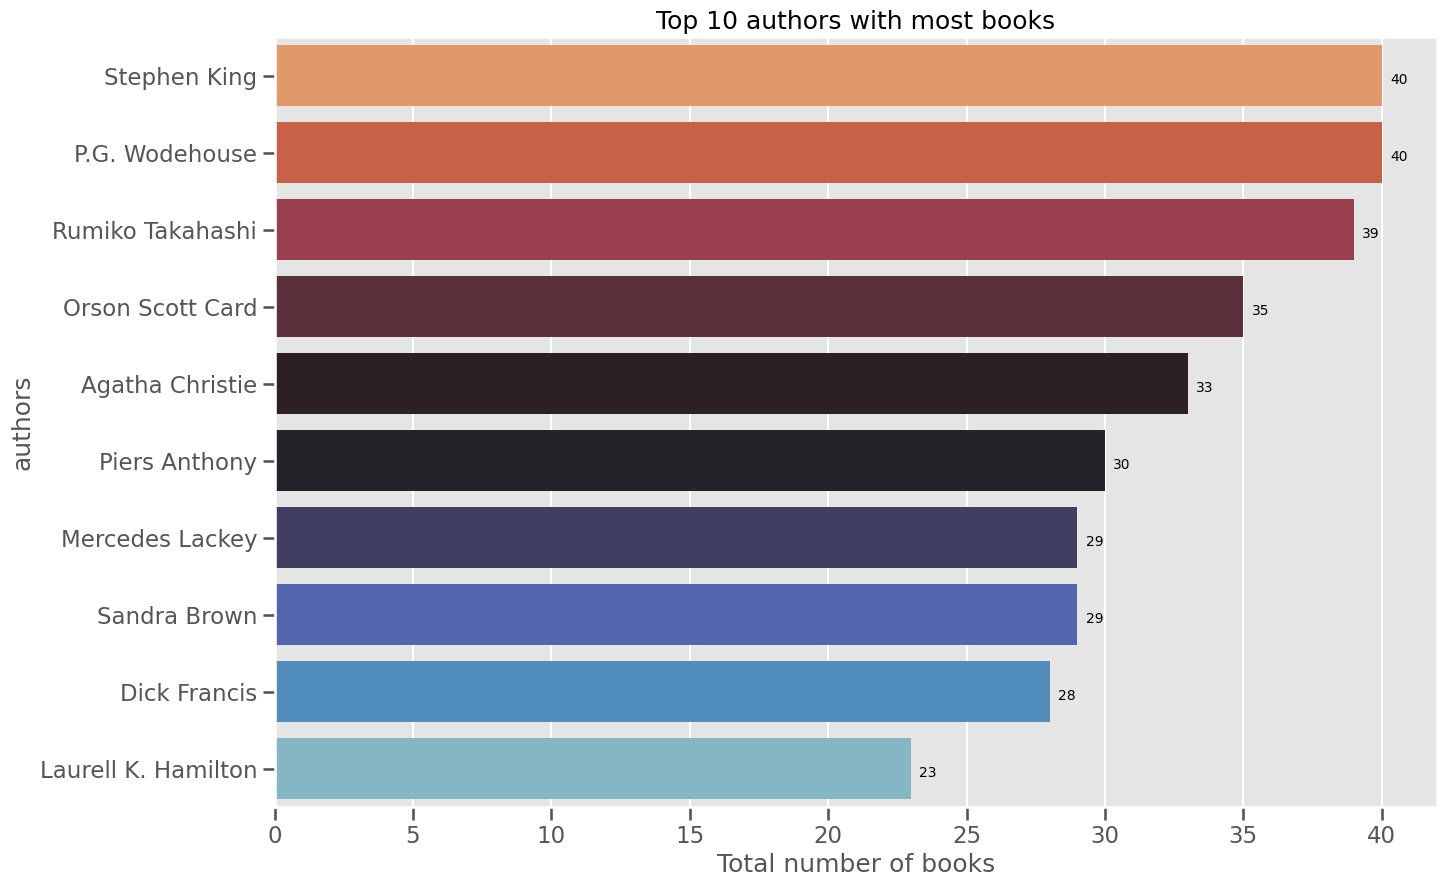

In [16]:
sns.set_context('talk')
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_books['title'], y=most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')



We can see from the above plot that Stephen King has the most number of books in the list - although a lot of them might be just various publications for the same book, considering the fact that his work has been here for quite a while, spanning decades.

From the names in the list, we can again gather that most of the authors have either been writing for decades, writing numerous books from time to time, or are authors who are regaled as the 'classics' in our history.

### Which are the top 10 highly rated authors?

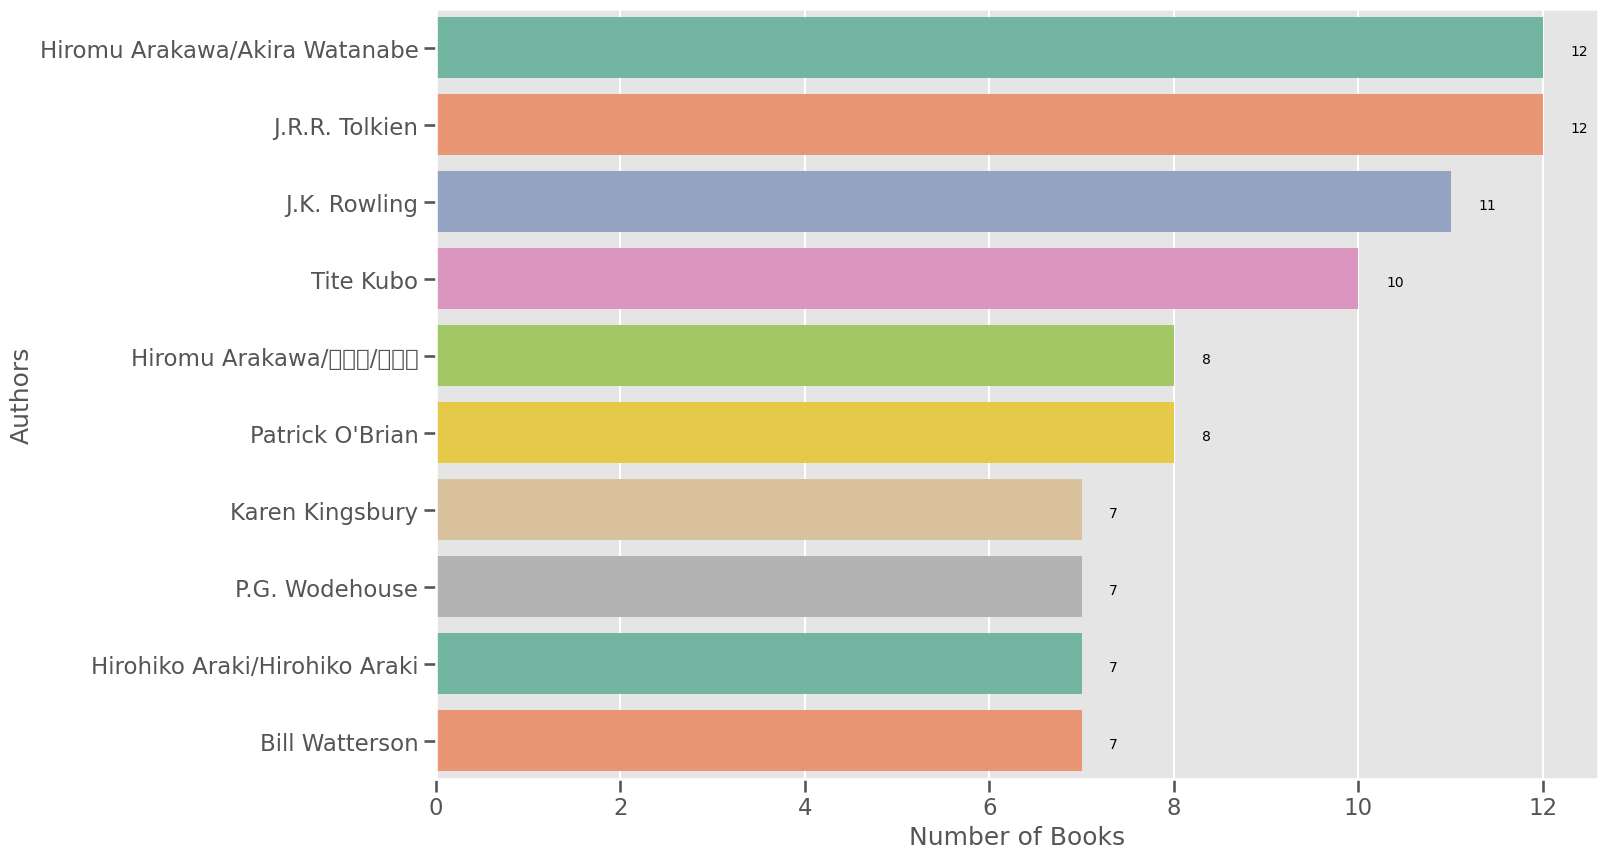

In [39]:
high_rated_author = df[df['average_rating']>=4.3]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=high_rated_author['title'], y=high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')





We can infer from the plot that the popular author J.R.R tolkien has the highest ratings for his books, making his average consistency rather impressive.

### What is the rating distribution for the books?

In [40]:

def segregation(data):
    values = []
    for val in data.average_rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

In [ ]:
df.average_rating.isnull().value_counts()

False    13714
Name: average_rating, dtype: int64

In [41]:
df.dropna(0, inplace=True)
#Removing Any null values

<Axes: xlabel='average_rating', ylabel='Density'>

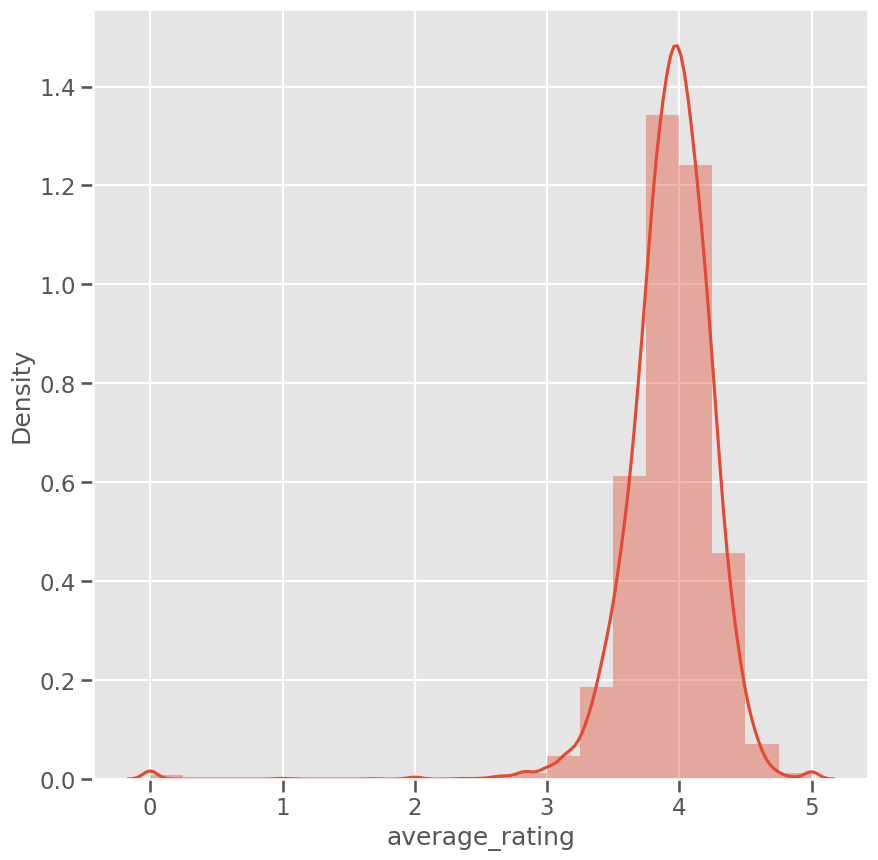

In [42]:
plt.figure(figsize=(10,10))
rating= df.average_rating.astype(float)
sns.distplot(rating, bins=20)



From the given plot, we can infer that:

- Majority of the ratings lie near 3.7-4.3, approximately.
- Books having scores near 5 are extremely rare

11123


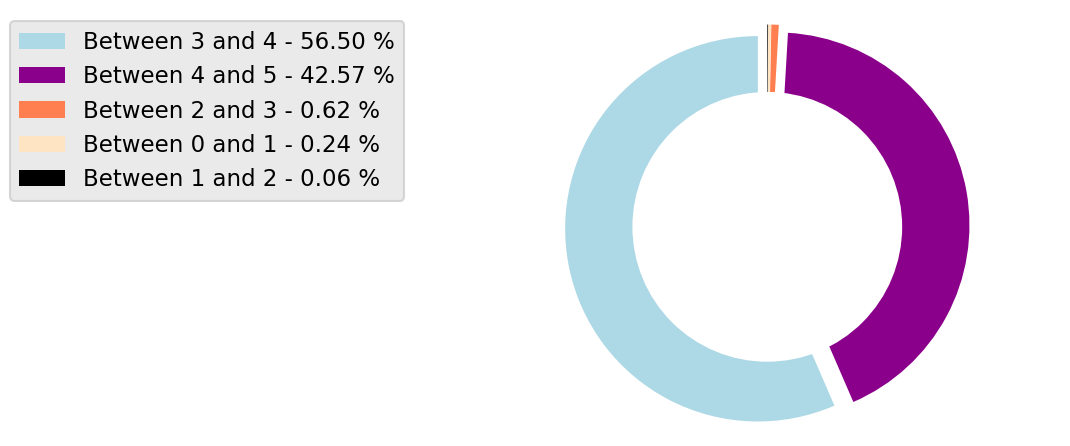

In [43]:
df['Ratings_Dist'] = segregation(df)
ratings_pie = df['Ratings_Dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['lightblue','darkmagenta','coral','bisque', 'black']
percent = 100.*ratings_pie['Ratings_Dist']/ratings_pie['Ratings_Dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['Ratings_Dist'],colors = colors,
        pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05))
#Draw a circle now:
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
#Equal Aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)



The kurtosis of the graph just seems to land between 3 and 4, signifying that for the effort it took to read, and the thrilling, unputdownable nature of the book, the majority of the ratings lie between 3 and 4.

### Is there any relationship between ratings and review counts?


<Figure size 1500x1000 with 0 Axes>

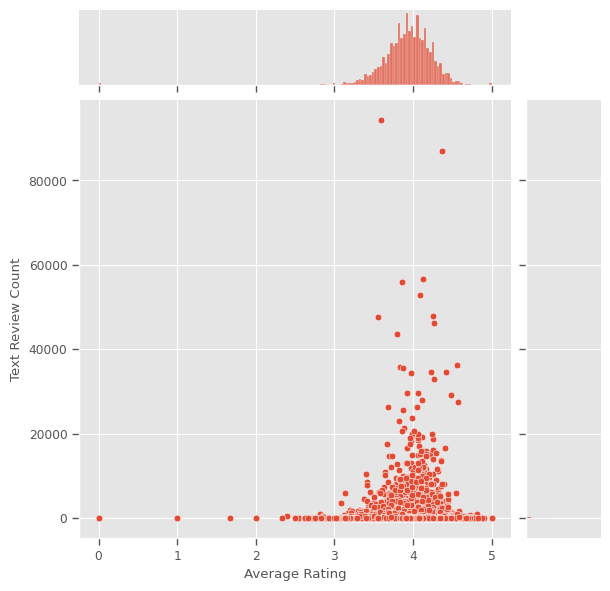

In [44]:
#Checking for any relation between them.
plt.figure(figsize=(15,10))
df.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  data= df[['text_reviews_count', 'average_rating']])
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()



Analysis: We can infer from the plot that most of the ratings for the books seems to lie near 3-4, with a heavy amount of reviews lying barely near 5000, approximately. Let's plot that.

In [45]:
trial = df[~(df['text_reviews_count']>5000)]

<Figure size 1500x1000 with 0 Axes>

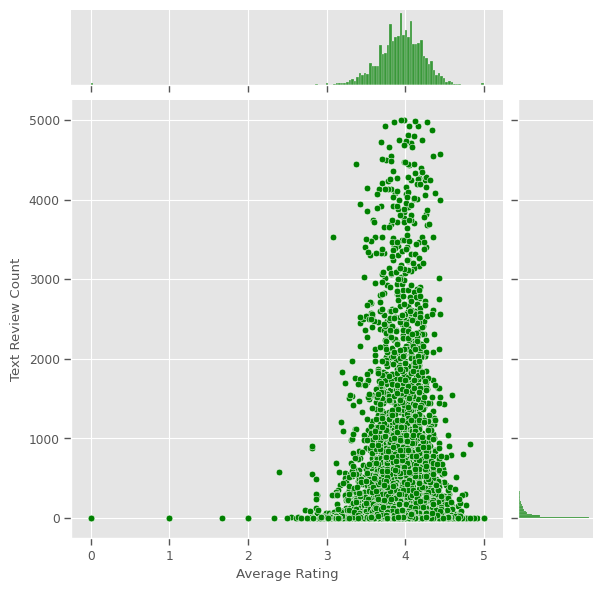

In [46]:
#Checking for any relation between them.
plt.figure(figsize=(15,10))
df.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  data= trial, color = 'green')
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()



It can be observed that even now, the majority of text reviews for books still lie under 1000, making this whole scenario inconclusive. There might be a relationship, but the reviews seem to be predominant amongst books with decent ratings.

Perhaps they are all scam reviews, or the density of the books in that field are just that _more_.

### Is there a relationship between number of pages and ratings?

<Figure size 1500x1000 with 0 Axes>

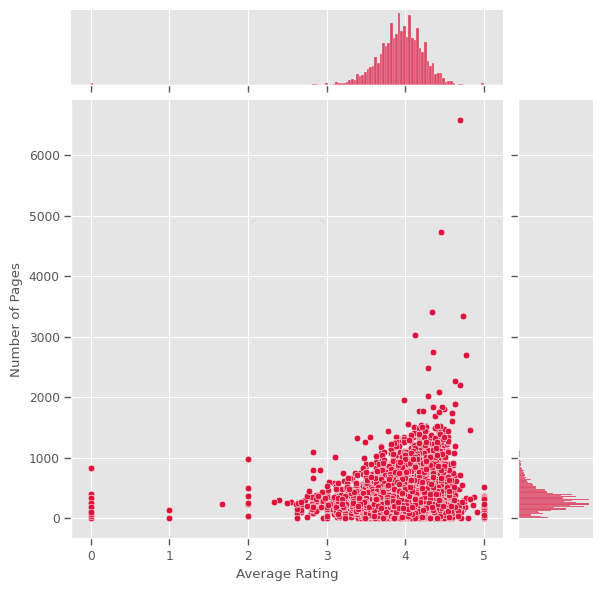

In [53]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="  num_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")


Analysis: This plot doesn't give that much of an accurate inference due to the massive presence of outliers for books above 1000 pages, for the _maximum_ density is between 0-1000 pages.

Based on that logic, let's explore the scenario in that range:

In [55]:
trial = df[~(df['  num_pages']>1000)]

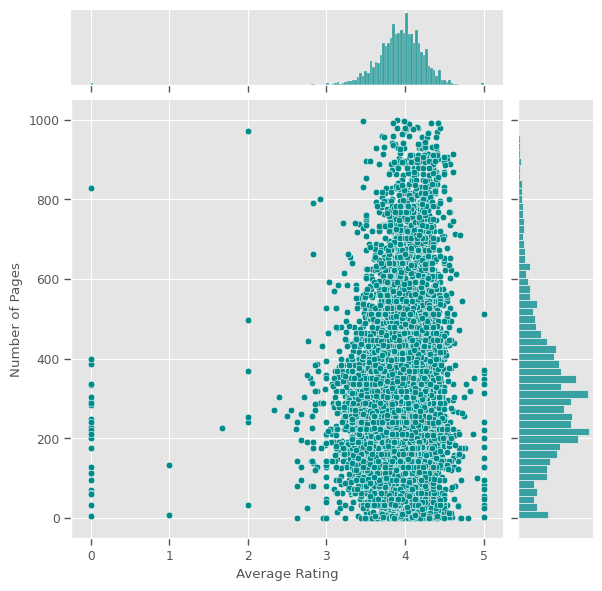

In [56]:
ax = sns.jointplot(x="average_rating", y="  num_pages", data = trial, color = 'darkcyan')
ax.set_axis_labels("Average Rating", "Number of Pages")


Analysis: From the given plot, we can infer that the highest ratings ever given, usually are for books with the page range of **200-400**, peaking near 250. It could lead to the fact that most of the people seem to prefer books with a moderate number of pages.

## Is there a relationship between ratings and ratings count?

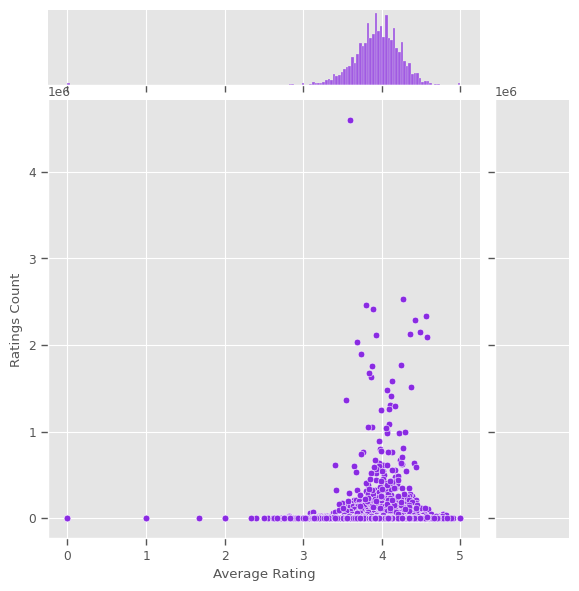

In [57]:
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="ratings_count", data = df, color = 'blueviolet')
ax.set_axis_labels("Average Rating", "Ratings Count")


There seem to be some outliers present in this. For a better outlook, let's consider the count around 2000000 ratings

In [58]:
trial = df[~(df.ratings_count>2000000)]

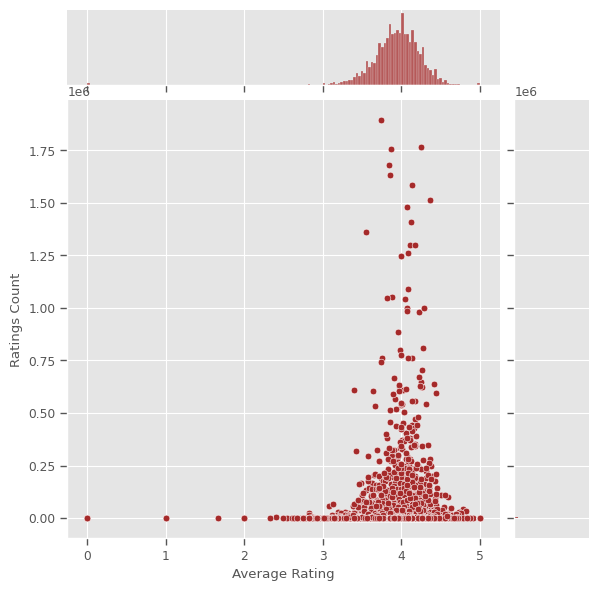

In [59]:
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="ratings_count", data = trial, color = 'brown')
ax.set_axis_labels("Average Rating", "Ratings Count")


From the graph, we can see that there can be a potential relationship between the average rating and ratings count. As the number of ratings increase, the rating for the book seems to taper towards 4. The average rating seems to become sparse while the number keeps on decreasing.

### Which are the books with the highest reviews?

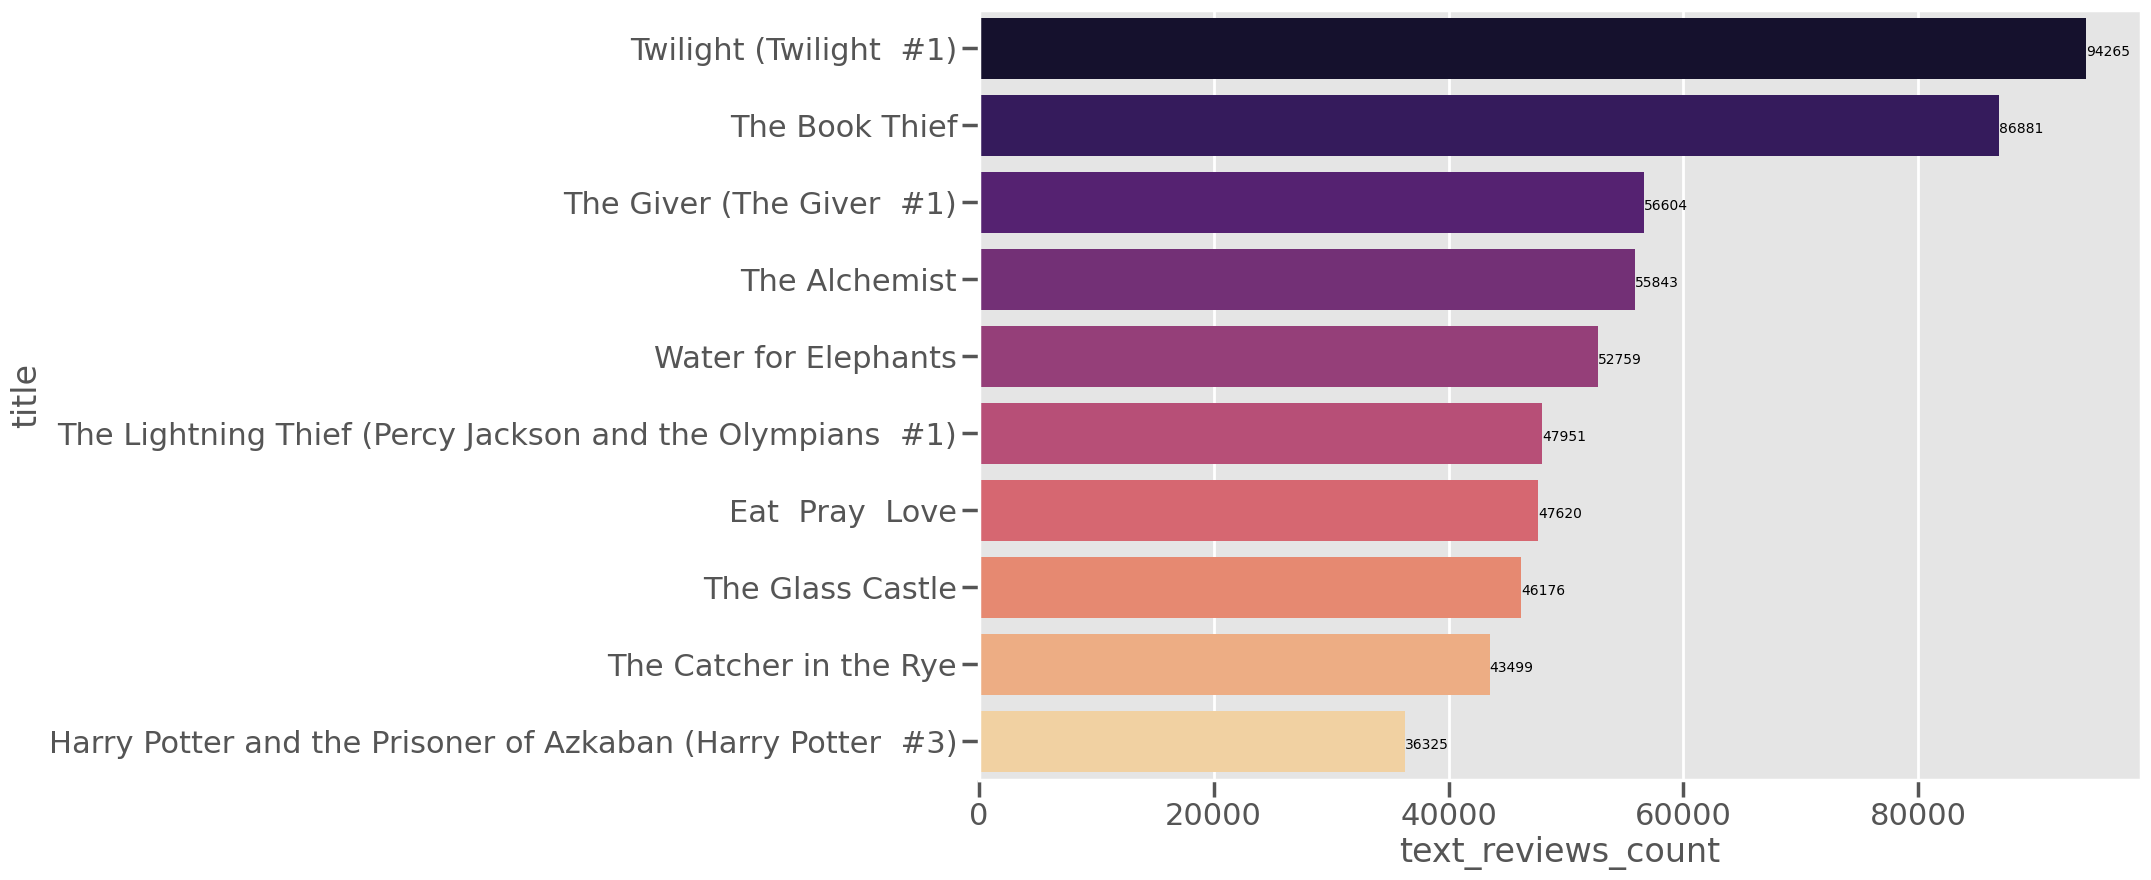

In [61]:
most_text = df.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.set_context('poster')
ax = sns.barplot(x=most_text['text_reviews_count'], y=most_text.index, palette='magma')
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
plt.show()




From all the above inferences, we can fundamentally decide that although the reviews matter, there can't be any specific relation between them and the ranking for all the books

# Topic Modelling

### KMeans Clustering

Since our goal is to find groups in data, we will use KMeans clustering which is a type of unsupervised learning which groups unlabelled data.

With this, we attempt to find a relationship or groups between the rating count and average rating value.

In [62]:
trial = df[['average_rating', 'ratings_count']]
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T



We will use the Elbow Curve method for the best way of finding the number of clusters for the data

Text(0.5, 1.0, 'Elbow Curve')

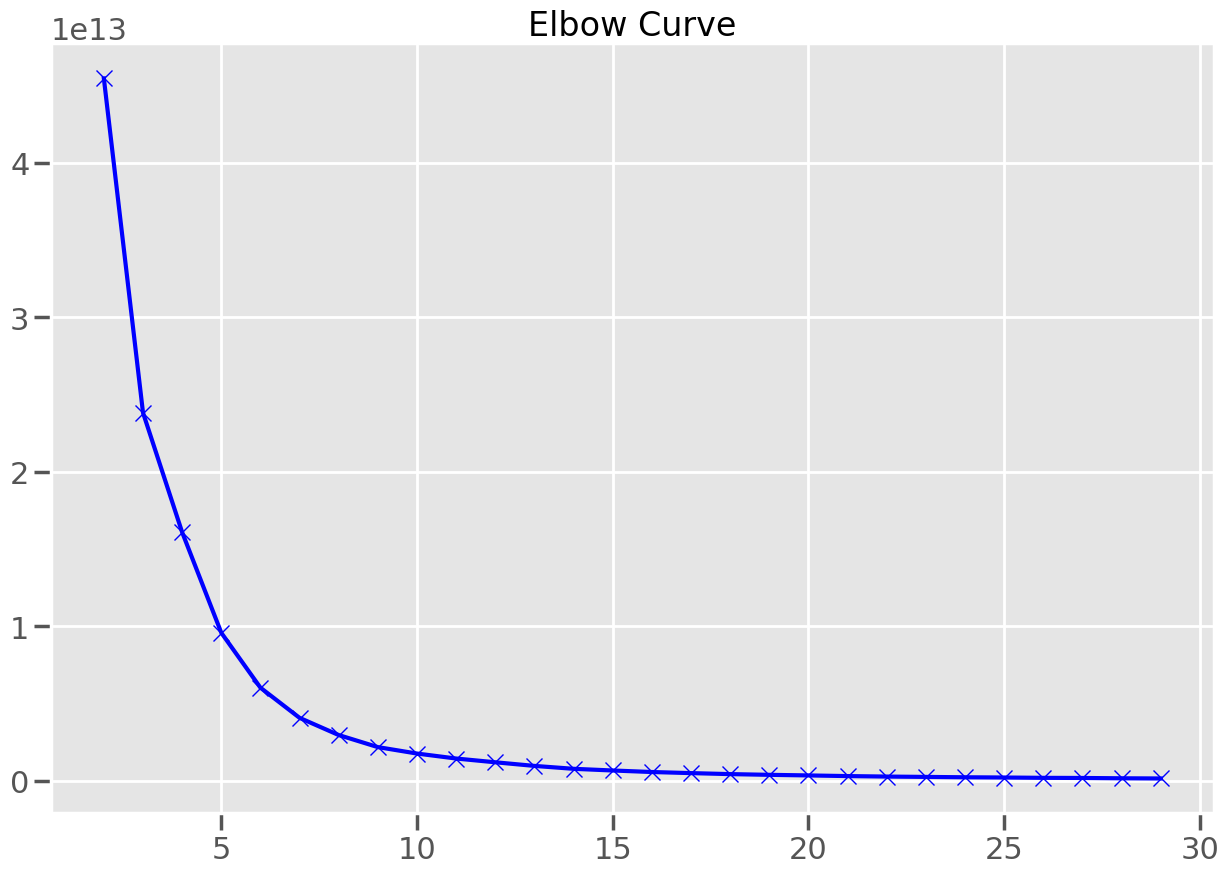

In [63]:
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

From the above plot, we can see that the elbow lies around the value K=5, so that's what we will attempt it with

In [64]:
#Computing K means with K = 5, thus, taking it as 5 clusters
centroids, _ = kmeans(data, 5)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)

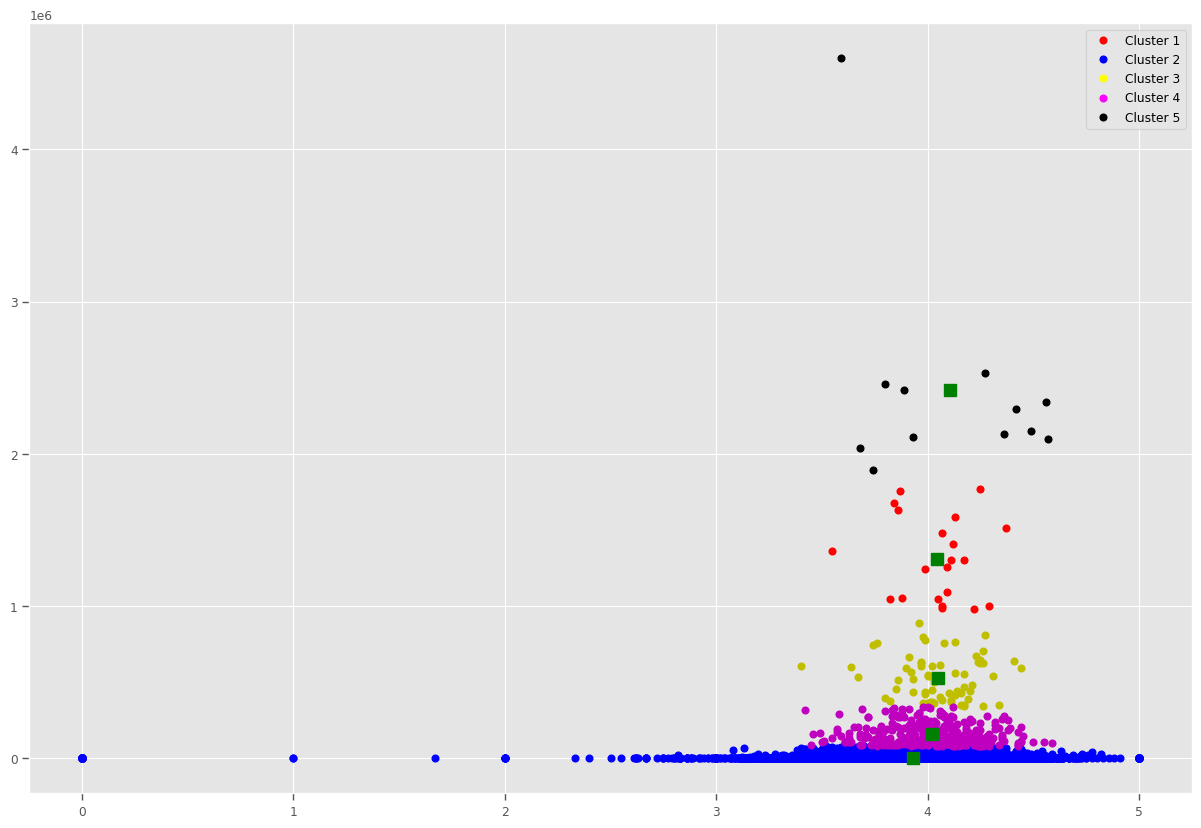

In [66]:
# some plotting using numpy's logical indexing
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )

circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )


plt.show()

We can see from the above plot, that because of two outliers, the whole clustering algortihm is skewed. Let's remove them and form inferences

## KMeans with optimisation

Finding the outliers and then removing them.

In [68]:
trial.idxmax()

average_rating     2034
ratings_count     41865
dtype: int64

In [70]:
trial.drop(41865, inplace = True)

In [71]:
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T




In [72]:
#Computing K means with K = 8, thus, taking it as 8 clusters
centroids, _ = kmeans(data, 5)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)

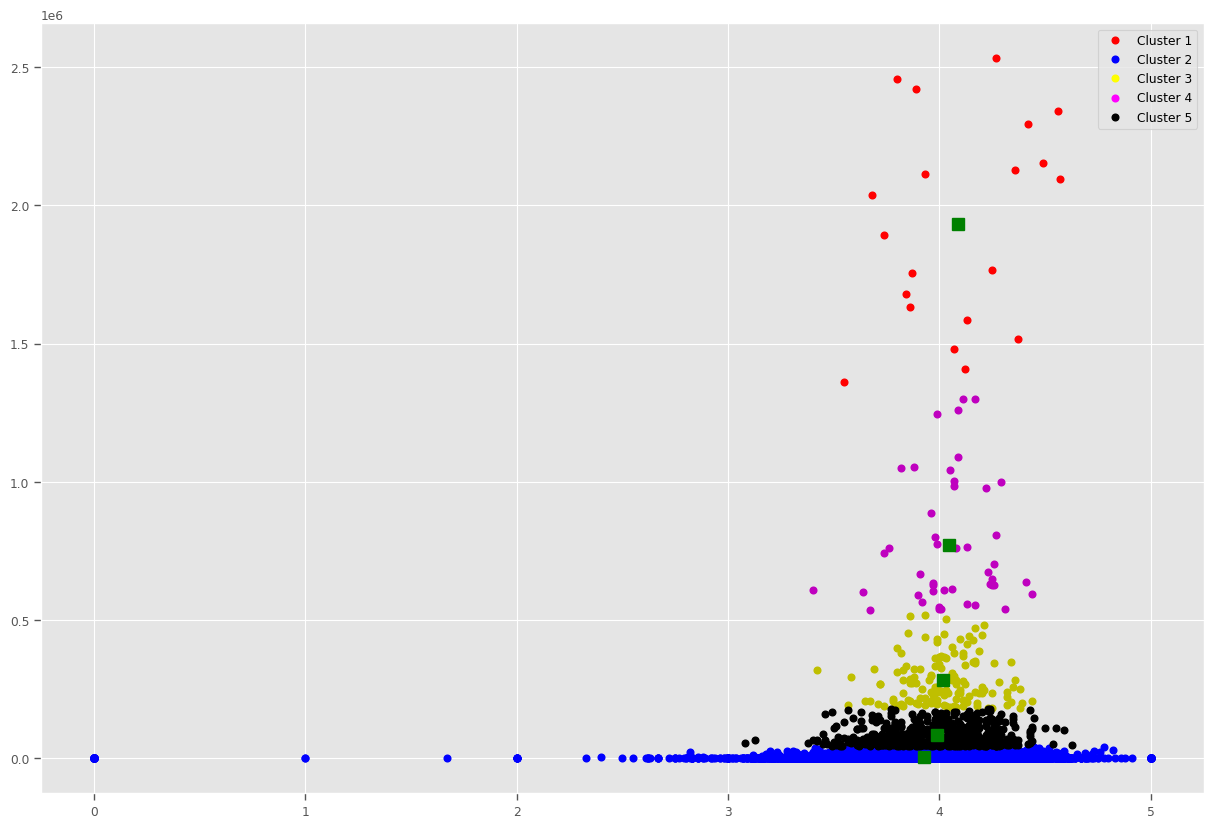

In [73]:
# some plotting using numpy's logical indexing
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )

circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )

plt.show()

From the above plot, now we can see that once the whole system _can_ be classified into clusters. As the count increases, the rating would end up near the cluster given above. The green squares are the centroids for the given clusters.

As the rating count seems to decrease, the average rating seems to become sparser, with higher volatility and less accuracy.

## Recommendation Engine


Having seen the clustering, we can infer that there can be some recommendations which can happen with the relation between Average Rating and Ratings Count.

Taking the Ratings_Distribution (A self created classifying trend), the recommendation system works with the algortihm of K Nearest Neighbors.

Based on a book entered by the user, the nearest neighbours to it would be classified as the books which the user might like.

KNN is used for both classification and regression problems. In classification problems to predict the label of a instance we first find k closest instances to the given one based on the distance metric and based on the majority voting scheme or weighted majority voting(neighbors which are closer are weighted higher) we predict the labels.

In a setting such as this, the unsupervised learning takes place, with the similar neighbors being recommended. For the given list, if I ask recommendations for "The Catcher in the Rye", five books related to it would appear.

Creating a books features table, based on the Ratings Distribution, which classifies the books into ratings scale such as:
- Between 0 and 1
- Between 1 and 2
- Between 2 and 3
- Between 3 and 4
- Between 4 and 5

Broadly, the recommendations then consider the average ratings and ratings cout for the query entered.

In [74]:
books_features = pd.concat([df['Ratings_Dist'].str.get_dummies(sep=","), df['average_rating'], df['ratings_count']], axis=1)

In [75]:
books_features.head()

,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,average_rating,ratings_count
bookID,,,,,,,
1,0,0,0,0,1,4.57,2095690
2,0,0,0,0,1,4.49,2153167
4,0,0,0,0,1,4.42,6333
5,0,0,0,0,1,4.56,2339585
8,0,0,0,0,1,4.78,41428


The min-max scaler is used to reduce the bias which would have been present due to some books having a massive amount of features, yet the rest having less. Min-Max scaler would find the median for them all and equalize it.


In [76]:
min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(books_features)

In [77]:
np.round(books_features, 2)

array([[0.  , 0.  , 0.  , ..., 1.  , 0.91, 0.46],
       [0.  , 0.  , 0.  , ..., 1.  , 0.9 , 0.47],
       [0.  , 0.  , 0.  , ..., 1.  , 0.88, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.79, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.74, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.78, 0.  ]])

In [78]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(books_features)
distance, indices = model.kneighbors(books_features)

Creating specific functions to help in finding the book names:
- Get index from Title
- Get ID from partial name
- Print the similar books from the feature dataset.
 *(This uses the Indices metric from the nearest neighbors to pick the books.)*

In [85]:
def get_index_from_name(name):
    try:
        return df[df["title"] == name].index.tolist()[0]
    except IndexError:
        return -1  # Or raise an exception

all_books_names = list(df.title.values)

def get_id_from_partial_name(partial):
    for name in all_books_names:
        if partial in name:
            print(name,all_books_names.index(name))

def print_similar_books(query=None,id=None):
  if query:
        found_id = get_index_from_name(query)
        if found_id == -1:
            print("Book not found.")
            return
        id = found_id

  if id is not None and id < len(indices):
        for idx in indices[id][1:]:
            if idx < len(df):
                print(df.iloc[idx]["title"])
            else:
                print("Index out of bounds for DataFrame.")
  else:
        print("Invalid book ID.")

To test the System, let's try with following examples-

- System by name: The Catcher in the Rye
- System by Name: Agile Web Development with Rails: A Pragmatic Guide
- System by partial name: Harry Potter and the


#### The Catcher in the Rye:

In [86]:
print_similar_books("The Catcher in the Rye")

Hitchhiker's Guide To The Galaxy: The Filming of the Douglas Adams classic
The Peloponnesian War
Henry and June: From the Unexpurgated Diary of Anaïs Nin
Hemingway & Bailey's Bartending Guide to Great American Writers
Liberty Before Liberalism


#### Agile Web Development with Rails: A Pragmatic Guide:

In [96]:
print_similar_books("Agile Web Development with Rails: A Pragmatic Guide")

The Art of Happiness at Work
Death in Kashmir
Bono: In Conversation with Michka Assayas
Die Entdeckung der Langsamkeit
The Legacy of Luna: The Story of a Tree  a Woman  and the Struggle to Save the Redwoods


#### Harry Potter and the:

Since most users won't remember the name for the entire book (especially how it has been entered in the books database), the function to get ID from the partial names helps to choose to ID of the book the user is looking for.

In [91]:
get_id_from_partial_name("Harry Potter and the ")

Harry Potter and the Half-Blood Prince (Harry Potter  #6) 0
Harry Potter and the Order of the Phoenix (Harry Potter  #5) 1
Harry Potter and the Chamber of Secrets (Harry Potter  #2) 2
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3) 3
Harry Potter and the Half-Blood Prince (Harry Potter  #6) 0
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3) 3
Harry Potter and the Chamber of Secrets (Harry Potter  #2) 2
Harry Potter and the Sorcerer's Stone (Harry Potter  #1) 8873
Harry Potter and the Philosopher's Stone (Harry Potter  #1) 10674
Harry Potter and the Goblet of Fire (Harry Potter  #4) 10675


In [92]:
print_similar_books(id = 1) #ID for the Book 5

Harry Potter and the Half-Blood Prince (Harry Potter  #6)
The Fellowship of the Ring (The Lord of the Rings  #1)
Harry Potter and the Chamber of Secrets (Harry Potter  #2)
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
The Hobbit  or There and Back Again


In [97]:
# Exportin the recommendation model
from joblib import dump

dump(model, '/content/drive/My Drive/model.joblib')
dump(indices, '/content/drive/My Drive/indices.joblib')
dump(books_features, '/content/drive/My Drive/books_features.joblib')

['/content/drive/My Drive/books_features.joblib']